# **Modelo de Clasificación  K-Vecinos y Regresión logística**

Para el problema de clasificar la calidad de una banana (good o bad) basandonos en distintas características, tanto la regresión logística como el modelo k-vecinos más cercanos (k-NN) son opciones viables. Por lo tanto abordaremos ambos modelos para comparar cual es el mejor. Esto ya que si deseamos interpretar cómo cada característica afecta la probabilidad de calidad good o bad, y si las relaciones pueden logísticas, la regresión logística podría ser la mejor opción. En cambio, al preferir otro enfoque más flexible, el cual pueda manejar relaciones no lineales y no necesitas una interpretación detallada de cada característica, el modelo k-NN podría ser más adecuado. Es por estas razones que se aplicaran ambos modelos.

Actualmente, se tiene clasificado la calidad de las bananas en dos grupos. Si la utilización de los datos relacionados a distintas caracteristicas de la banana puede servirnos para predecir a que grupo al cual pertenecen, el hecho de predecir la calidad de una banana ayudaria con la reducción del desperdicio de alimentos, ya que no solo permitiria optimizar el inventario, si no tambien el consumo, asegurando que las bananas se vendan y se consuman en su punto óptimo de madurez, lo que reduce significativamente el desperdicio de alimentos, esta tarea por lo tanto sería un problema de clasificación. Es decir, dado el conjunto de datos, se necesita construir un modelo para predecir la calidad de una nueva banana.

Para este caso, se usarán caracteristicas de la banana, las cuales son: Tamaño (Size), Peso (Weight), Dulzura (Sweetness), Suavidad (Softness), Tiempo de cosecha (HarvestTime), Madurez (Ripeness), Acidez (Acidity).

El campo de destino, llamado `Quality`, tiene dos valores posibles que corresponden a los dos estados en los que puede estar la banana, de la siguiente manera:

0. Bad
1. Good


Como se menciono anteriormente, se trabajará un conjunto de datos relacionado con la calidad de las bananas. Luego, se dividirán los datos en conjuntos de entrenamiento y prueba, se creará un modelo usando el conjunto de entrenamiento, se evaluará su modelo usando el conjunto de prueba y finalmente se usará el modelo para predecir el valor desconocido.

## Tabla de Contenidos

1. [Importar y Preparar los Datos de Análisis](#2)
2. [Pre-procesamiento de los datos](#3)
3. [Configuración del modelo K-vecinos](#4)
4. [Regresión logística](#5)
5. [Configuración del Modelo de Regresión logística](#6)
6. [Conclusiones de los modelos de clasificación](#7)


lusiones de los modelos de clasificación](#7)


# 1. Importar y Preparar los Datos de Análisis <a id="2"></a>

## Carga y Preparación de Datos

Instalar e importar Bibliotecas:

In [57]:
# Instalar bibliotecas específicas para trabajar 
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn
!pip3 install seaborn


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importar los paquetes de procesamiento y visualización de datos **pandas**, **numpy**, **matplotlib**, **sklearn** y **scipy**. No olvidar de poner `% matplotlib inline` para que las gráficas puedan aparecer en *Jupyter Notebook*.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline

## Leer el Conjunto de Datos

Cargar los datos y guardarlos en el dataframe `df`:

In [59]:
# ruta de datos y leer los datos para guardarlos en df

path='datos/banana_quality.csv'
df = pd.read_csv(path)

Al visualizar variables individuales, es importante saber el tipo de variable que se está tratando, para aquello se usara `df.dtypes` para ver de que tipo son cada variable:

In [60]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [61]:
# mostrar los 5 primeros registros de conjunto de datos
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Inicialmente el DataFrame contiene una columna llamada **Quality**, la cuál contiene dos valores tipo object, Good y Bad, que fueron cambiados a 1 y 0 respectivamente, para poder estudiar la correlación entre las variables 

In [62]:
df['Quality'] = df['Quality'].replace({'Good': 1, 'Bad': 0})

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_21560\842005656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Quality'] = df['Quality'].replace({'Good': 1, 'Bad': 0})


In [63]:
# mostrar los 5 primeros registros de conjunto de datos luego del cambio del campo Quality

df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


# 2. Pre-procesamiento de los Datos<a id="3"></a>


Antes de iniciar con la configuración del modelo, se realizará un preprocesamiento de los datos. Este incluirá un análisis de correlación para seleccionar las características más relevantes que contribuirán al desempeño del modelo. En particular, se evaluará la correlación de Pearson para identificar las variables que tienen una relación significativa con la variable objetivo. Las características que demuestren una correlación alta se conservarán, optimizando así el conjunto de datos para el entrenamiento del modelo.

Primero se va a realizar un rápido análisis y visualización de los Datos. Se utilizara el metodo `df.value_counts()`, para observar cuantas bananas hay en cada clase en el conjunto de datos.

In [64]:
df['Quality'].value_counts()

Quality
1    4006
0    3994
Name: count, dtype: int64

Como se puede observar, hay 4006 Bananas de calidad Buena (Good) y 3994 Bananas de calidad Mala (Bad)

## Correlación y Correlación de Pearson 
A continuación se analizará la correlación y la correlación de Pearson, las cuales son fundamentales para entender las relaciones entre las variables. La correlación nos ayudará, en términos generales, a identificar si dos variables tienen alguna relación. Luego, al aplicar y observar la correlación de Pearson específicamente, mediremos la relación lineal entre las variables continuas del DataFrame df, cuantificándola con un coeficiente que varía entre -1 y 1. La correlación de Pearson nos servirá de ayuda para cuantificar qué tan bien una variable puede predecir a la otra.

In [65]:
df.corr(numeric_only=True)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673,0.352983
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879,0.388789
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059,0.377220
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014,-0.001637
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903,0.376600
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531,0.350503
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000,-0.000860
Quality,0.352983,0.388789,0.377220,-0.001637,0.376600,0.350503,-0.000860,1.000000


Para evaluar la significancia estadística, que es una medida de la fiabilidad en los resultados de un análisis y que permite tomar decisiones con mayor confianza, utilizaremos la correlación de Pearson para cada característica de la banana en relación con su calidad. Esto nos ayudará a determinar qué tan bien cada característica puede predecir la calidad de la banana.

##  Peso versus Calidad

Calcular el coeficiente de la **Correlación de Pearson** y el **valor P** de `Weight` y `Quality`.

In [66]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Weight'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.3887889014342623  con un valor de P = 5.513984954425239e-287


##  Tamaño versus Calidad

Calcular el coeficiente de la **Correlación de Pearson** y el **valor P** de `Size` y `Quality`.

In [67]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Size'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.35298288717138604  con un valor de P = 1.960547470665041e-233


##  Dulzura versus Calidad

Calcular el coeficiente de la **Correlación de Pearson** y el **valor P** de `Sweetness` y `Quality`.

In [68]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Sweetness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.37721998620869324  con un valor de P = 6.195977428804751e-269


##  Blandura versus Calidad

Calcular el coeficiente de la **Correlación de Pearson** y el **valor P** de `Softness` y `Quality`.

In [69]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Softness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.0016374770035392045  con un valor de P = 0.8835759406046256


##  Tiempo cosecha versus Calidad

Calcular el coeficiente de la **Correlación de Pearson** y el **valor P** de `HarvestTime` y `Quality`.

In [70]:
coeficiente_pearson, valor_p = stats.pearsonr(df['HarvestTime'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.3766002028322521  con un valor de P = 5.477675102993626e-268


##  Madurez versus Calidad

Calcular el coeficiente de la **Correlación de Pearson** y el **valor P** de `Ripeness` y `Quality`.

In [71]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Ripeness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.350503385265196  con un valor de P = 5.656660876896538e-230


##  Acidez versus Calidad

Calcular el coeficiente de la **Correlación de Pearson** y el **valor P** de `Acidity` y `Quality`.

In [72]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Acidity'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.0008596341117588012  con un valor de P = 0.9387221807334138


En base a los datos recopilados de correlación y de los respectivos **valores de P**, las dos características que se descartaran con el objetivo simplificar el modelo sin perder información relevante sobre la calidad de las bananas, son:

- Softness: Tiene un coeficiente de correlación casi nulo (-0.0016) y un valor p muy alto (0.88), indicando que no hay una relación significativa con la calidad de la banana.

- Acidity: De una manera similar, tiene un coeficiente de correlación casi nulo (-0.00089) y un valor p muy alto (0.93), indicando que no hay una relación significativa con la calidad de la banana.


Un paso importante es definir las variable **X** e **y** y que atributos o características la van a componer. Para ello se usaran las caracteristicas que no fueron descartadas anteriormente.

Para crear la variable `X` pasaremos el datafrma de *Pandas* a un arreglo *Numpy* para usar la biblioteca *scikit-learn*. Eliminando la variable de respuesta o dependiente.

In [73]:
X = df[['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness']].values  #.astype(float)
X[0:5]

array([[-1.92,  0.47,  3.08,  0.29,  2.44],
       [-2.41,  0.49,  0.35, -0.89,  2.07],
       [-0.36,  1.48,  1.57, -0.65,  3.09],
       [-0.87,  1.57,  1.89, -1.01,  1.87],
       [ 0.65,  1.32, -0.02, -1.43,  1.08]])

Siguiendo el mismo procedimiento para crear la variable `y2` con el atributo o variable dependiente `Quality` que contiene el valor de las etiquetas.

In [74]:
y = df['Quality'].values
y[0:5]

array([1, 1, 1, 1, 1])

El último paso del pre-procesamiento de los datos de entrada consiste **Normalizar los Datos**, esto se hara para el algortimo *K-Vecino más Cercano*, que se basa en la distancia de los casos de clasificación.

In [75]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-0.55,  0.61,  1.98,  0.52,  0.78],
       [-0.78,  0.62,  0.57, -0.07,  0.61],
       [ 0.18,  1.11,  1.2 ,  0.05,  1.09],
       [-0.06,  1.15,  1.37, -0.13,  0.52],
       [ 0.66,  1.03,  0.38, -0.34,  0.14]])

# 3. Configuración modelo K-vecinos <a id="4"></a>

Antes de comenzar con el modelado, hay que separar los datos en conjuntos de entrenamiento y prueba, esta parte es importante para mejorar la precisión fuera de la muestra del modelo. La precisión fuera de la muestra se refiere a qué tan bien el modelo predice datos nuevos que no ha visto antes. Es por esto que si entrenamos y probamos el modelo con el mismo conjunto de datos, puede aprender demasiado de los datos, un problema conocido como sobreajuste. Entonces al dividir los datos en dos conjuntos permitiria que al momento de entrenar el modelo en un conjunto y probarlo en otro que no ha visto, nos proporcione una evaluación más realista y precisa de su rendimiento en datos desconocidos.

In [76]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X_entrena.shape,  y_entrena.shape)
print ('Conjunto de Prueba:', X_prueba.shape,  y_prueba.shape)

Conjunto de Entrenamiento set: (6400, 5) (6400,)
Conjunto de Prueba: (1600, 5) (1600,)


## Modelado

In [77]:
#Importar y cargar el módulo `neighbors` que habilita el clasificador que implementa el modelo del K-Vecinos más Cercano.
from sklearn.neighbors import KNeighborsClassifier

A continuación se crea una instancia del modelo para luego entrenar el modelo con los conjuntos de datos de entrenamiento. Inicialmente se procedio al entrenamiento del algoritmo con k=7, pero luego de ver el k mas optimo se dejo en k =14.

In [78]:
k = 14
# Crear y entrenar el modelo y pronosticar  
vecino = KNeighborsClassifier(n_neighbors = k)
vecino.fit(X_entrena,y_entrena)
vecino

KNeighborsClassifier(n_neighbors=14)

## Pronóstico

Ahora ya creada la instancia,  se puede usar el modelo para predecir el conjunto de prueba.

In [79]:
y_hat = vecino.predict(X_prueba)
y_hat[0:5]

array([0, 0, 0, 1, 1])

## Evaluación

En la clasificación multi-etiqueta, `accuracy_score` es una función que calcula la precisión del subconjunto. Esencialmente, esta funcion calcula qué tan cerca coinciden las etiquetas reales y las etiquetas predichas en el conjunto de prueba.

In [80]:
print("Precisión del conjunto de entrenamiento: ", metrics.accuracy_score(y_entrena, vecino.predict(X_entrena)))
print("Precisión del conjunto de prueba: ", metrics.accuracy_score(y_prueba, y_hat))

Precisión del conjunto de entrenamiento:  0.929375
Precisión del conjunto de prueba:  0.934375


## Refinamiento

En KNN, \( K \) es el número de vecinos más cercanos que se considera para hacer una predicción. Elegir el valor correcto de \( K \) es crucial para obtener el mejor rendimiento de nuestro modelo. Un \( K \) demasiado bajo puede hacer que el modelo sea demasiado sensible al ruido en los datos (sobreajuste), mientras que un \( K \) demasiado alto puede hacer que el modelo sea demasiado general y no capture bien las relaciones en los datos (subajuste). Para encontrar el \( K \) óptimo, se irán probando varios valores reservando una parte de los datos para pruebas, empezando con un \( K = 1 \), entrenando el modelo y midiendo la precisión usando los datos de prueba. Luego, se aumentará \( K \) y se repetirá el proceso.

In [81]:
Ks = 20
prec_promedio = np.zeros((Ks-1))
prec_estandar = np.zeros((Ks-1))
matriz_confusion = [];
for n in range(1,Ks):
    # Entrena el modelo y pronostica  
    vecino_n = KNeighborsClassifier(n_neighbors = n).fit(X_entrena,y_entrena)
    y_hat=vecino_n.predict(X_prueba)
    prec_promedio[n-1] = metrics.accuracy_score(y_prueba, y_hat)
    prec_estandar[n-1] = np.std(y_hat==y_prueba)/np.sqrt(y_hat.shape[0])

print('Precisión promedio: ',prec_promedio)
print('Precisión desviación estándar: ',prec_estandar)

Precisión promedio:  [0.9  0.9  0.93 0.92 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93
 0.93 0.93 0.93 0.93 0.93]
Precisión desviación estándar:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01]


Grafico de la precisión del modelo para un número $k$ diferente de vecinos.

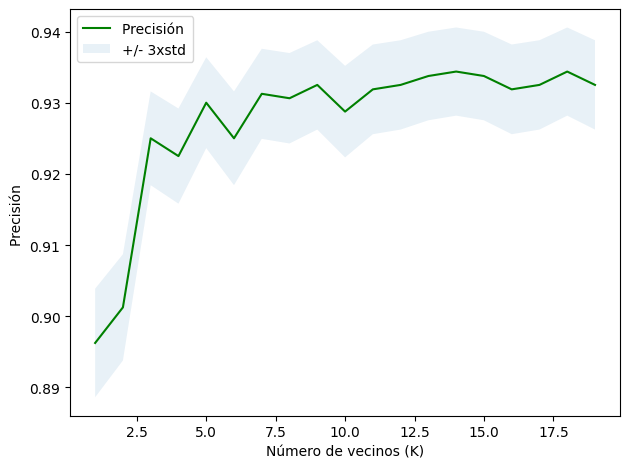

In [82]:
plt.plot(range(1,Ks),prec_promedio,'g')
plt.fill_between(range(1,Ks),prec_promedio - 1 * prec_estandar,prec_promedio + 1 * prec_estandar, alpha=0.10)
plt.legend(('Precisión ', '+/- 3xstd'))
plt.ylabel('Precisión ')
plt.xlabel('Número de vecinos (K)')
plt.tight_layout()
plt.show()

In [83]:
print( "La mejor precisión se obtuvo con", prec_promedio.max(), "con k=", prec_promedio.argmax()+1) 

La mejor precisión se obtuvo con 0.934375 con k= 14


Ahora observaremos, como es la matriz de confusión de este modelo:

In [84]:
# Esta función imprime y grafica una matriz de confusión.
# Se puede aplicar una normalización configurando el parámetro `normalize=True`.

import itertools

def grafica_matriz_confusion(matr_conf, clases,
                          normalizar=False,
                          titulo='Matriz de Confusión',
                          cmap=plt.cm.Blues):

    if normalizar:
        matr_conf = matr_conf.astype('float') / matr_conf.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada.")
    else:
        print('Matriz de Confusión matrix sin normalización')

    print(matr_conf)

    plt.imshow(matr_conf, interpolation='nearest', cmap=cmap)
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=45)
    plt.yticks(tick_marks, clases)

    formato = '.2f' if normalizar else 'd'
    umbral = matr_conf.max() / 2.
    for i, j in itertools.product(range(matr_conf.shape[0]), range(matr_conf.shape[1])):
        plt.text(j, i, format(matr_conf[i, j], formato),
                 horizontalalignment="center",
                 color="white" if matr_conf[i, j] > umbral else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta valores Verdaderos')
    plt.xlabel('Etiqueta valores Pronosticados')

Matriz de Confusión matrix sin normalización
[[727  50]
 [ 58 765]]


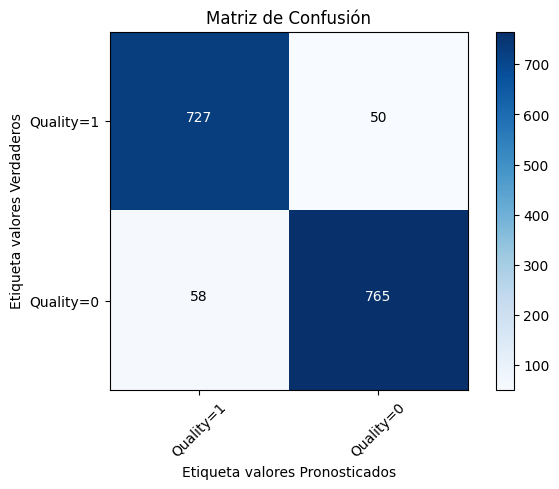

In [85]:

matriz_confusion = metrics.confusion_matrix(y_prueba, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Grafica matriz de confusión no normalizada
plt.figure()
grafica_matriz_confusion(matriz_confusion, clases=['Quality=1','Quality=0'],normalizar= False,  titulo='Matriz de Confusión')

# 4. Regresión logística <a id="5"></a>


Cargar los datos y guardarlos en el dataframe `df4`:

In [86]:
path4='datos/banana_quality.csv'
df4 = pd.read_csv(path4)
df4.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Tamaño y forma del conjunto de datos.

In [87]:
print('Tamaño: ', df4.size)
print('Forma: ', df4.shape)

Tamaño:  64000
Forma:  (8000, 8)


Al igual que se hizo para el modelo de k-vecinos, se reemplazará la columna `Quality` por 0 y 1, ya que el tipo de dato objetivo debe ser un número entero, lo cual es un requisito del módulo a utilizar de `scikit-learn`.

In [88]:
df4['Quality'] = df4['Quality'].replace({'Good': 1, 'Bad': 0})

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_21560\2125369980.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['Quality'] = df4['Quality'].replace({'Good': 1, 'Bad': 0})


Definir **X4** e **y4** a partir del conjunto de datos seleccionado en el modelo pasado, es decir dejando solo las columnas que no fueron descartadas.

In [89]:
X4 = np.asarray(df4[['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness']])
X4[0:5]

array([[-1.92,  0.47,  3.08,  0.29,  2.44],
       [-2.41,  0.49,  0.35, -0.89,  2.07],
       [-0.36,  1.48,  1.57, -0.65,  3.09],
       [-0.87,  1.57,  1.89, -1.01,  1.87],
       [ 0.65,  1.32, -0.02, -1.43,  1.08]])

In [90]:
y4 = np.asarray(df4['Quality'])
y4 [0:5]

array([1, 1, 1, 1, 1])

Además, se normalizara el conjunto de datos asociado a la variable **X4**:

In [91]:
X4 = preprocessing.StandardScaler().fit_transform(X4)
X4[0:5]

array([[-0.55,  0.61,  1.98,  0.52,  0.78],
       [-0.78,  0.62,  0.57, -0.07,  0.61],
       [ 0.18,  1.11,  1.2 ,  0.05,  1.09],
       [-0.06,  1.15,  1.37, -0.13,  0.52],
       [ 0.66,  1.03,  0.38, -0.34,  0.14]])

# 4.Configuración del Modelo de Regresión logística <a id="6"></a>

Ahora, se dividira el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba


In [92]:
X4_entrena, X4_prueba, y4_entrena, y4_prueba = train_test_split(X4, y4, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X4_entrena.shape,  y4_entrena.shape)
print ('Conjunto de Prueba:', X4_prueba.shape,  y4_prueba.shape)

Conjunto de Entrenamiento set: (6400, 5) (6400,)
Conjunto de Prueba: (1600, 5) (1600,)


## Modelado Regresión logística

El siguiente paso es utilizar el módulo `LogisticRegression` de la biblioteca `Scikit-learn` para construir nuestro modelo. La regresión logística es un método que se usa para predecir resultados binarios, como sí o no, o como en nuestro caso Good o Bad y puede ajustarse para evitar que nuestro modelo se sobreajuste a los datos de entrenamiento. El parámetro `C` en la regresión logística controla la fuerza de esta regularización, valores de  `C` más pequeños significan una regularización más fuerte, lo que ayudaria a evitar que el modelo se ajuste demasiado a los detalles específicos de los datos de entrenamiento. Una vez importado el módulo `LogisticRegression`, ajustaremos nuestro modelo usando el conjunto de entrenamiento para que aprenda a predecir correctamente los resultados deseados.

- Para es caso se usara solve = `liblinear`, ya que este solucionador está optimizado para problemas de clasificación binaria y es eficiente en términos de memoria. Ademas al ser problema estándar de clasificación binaria y no tener restricciones específicas adicionales es util utilizarlo, en vez de lbfgs.

Antes de realizar la construcción del modelo, utilizaremos validación cruzada para encontrar el mejor valor para C. Así podremos evaluar el rendimiento del modelo con diferentes valores de C y seleccionar el que proporciona los mejores resultados.


In [93]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Definir diferentes valores de C a probar
C_values = [0.01, 0.1, 1, 10, 100]
scores = {}

for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear') 
    cv_scores = cross_val_score(model, X4_entrena,y4_entrena, cv=5, scoring='accuracy')
    scores[C] = np.mean(cv_scores)


for C, score in scores.items():
    print(f"Precisión promedio con C={C}: {score}")

# Determinar el mejor valor de C
best_C = max(scores, key=scores.get)
print(f"Mejor valor de C: {best_C}")


Precisión promedio con C=0.01: 0.875
Precisión promedio con C=0.1: 0.8731250000000002
Precisión promedio con C=1: 0.8732812500000001
Precisión promedio con C=10: 0.87328125
Precisión promedio con C=100: 0.87328125
Mejor valor de C: 0.01


In [94]:
from sklearn.linear_model import LogisticRegression

regr_logi = LogisticRegression(C=0.01, solver='liblinear').fit(X4_entrena,y4_entrena)
regr_logi

LogisticRegression(C=0.01, solver='liblinear')

## Pronóstico Regresión logística

Una vez entrenado el modelo se puede realizar el pronóstico o prediccion con el conjunto de datos de prueba.

In [95]:
y4_hat = regr_logi.predict(X4_prueba)
y4_hat

array([0, 0, 0, ..., 0, 1, 1])

La función `predict_proba` devuelve estimaciones para las clases que hay, ordenadas por la etiqueta de las clases. Así, la primera columna es la probabilidad de la clase 0 y la segunda columna es la probabilidad de la clase 1.

In [96]:
y4_hat_prob = regr_logi.predict_proba(X4_prueba)
y4_hat_prob

array([[0.91, 0.09],
       [0.92, 0.08],
       [0.96, 0.04],
       ...,
       [0.88, 0.12],
       [0.07, 0.93],
       [0.1 , 0.9 ]])

## Evaluación Regresión logística

**Índice de Jaccard**

Se utilizará el **índice jaccard** para evaluar la precisión. Si todo el conjunto de etiquetas pronosticadas para una muestra coincide estrictamente con el verdadero conjunto de etiquetas, entonces la precisión del subconjunto es $1,0$; de lo contrario es $0,0$.

In [97]:
metrics.jaccard_score(y4_prueba, y4_hat)

np.float64(0.7861271676300579)


El valor de 0.7861271676300579 sugiere que las etiquetas predichas tienen una similitud del 78.61% con las etiquetas reales, lo cual nos podria indicar que es una medida positiva de la precisión del modelo en la clasificación multiclase.

**Matiz de Confusión**

Otra forma de observar la precisión del modelo, es mediante la matriz de confusión. Con la matriz podremos ver en forma de tabla cuántas predicciones de cada clase son correctas o incorrectas. Cada columna representa el número de predicciones para una clase, y cada fila muestra cuántas instancias reales pertenecen a esa clase. Esto permite analizar cómo el modelo clasifica cada clase y ayuda a identificar los tipos de errores y aciertos que comete el modelo.

A continuación se define una función para graficar una matriz de confusión.

In [98]:
# Esta función imprime y grafica una matriz de confusión.
# Se puede aplicar una normalización configurando el parámetro `normalize=True`.

import itertools

def grafica_matriz_confusion(matr_conf, clases,
                          normalizar=False,
                          titulo='Matriz de Confusión',
                          cmap=plt.cm.Blues):

    if normalizar:
        matr_conf = matr_conf.astype('float') / matr_conf.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada.")
    else:
        print('Matriz de Confusión matrix sin normalización')

    print(matr_conf)

    plt.imshow(matr_conf, interpolation='nearest', cmap=cmap)
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=45)
    plt.yticks(tick_marks, clases)

    formato = '.2f' if normalizar else 'd'
    umbral = matr_conf.max() / 2.
    for i, j in itertools.product(range(matr_conf.shape[0]), range(matr_conf.shape[1])):
        plt.text(j, i, format(matr_conf[i, j], formato),
                 horizontalalignment="center",
                 color="white" if matr_conf[i, j] > umbral else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta valores Verdaderos')
    plt.xlabel('Etiqueta valores Pronosticados')

Matriz de Confusión matrix sin normalización
[[680  97]
 [ 88 735]]


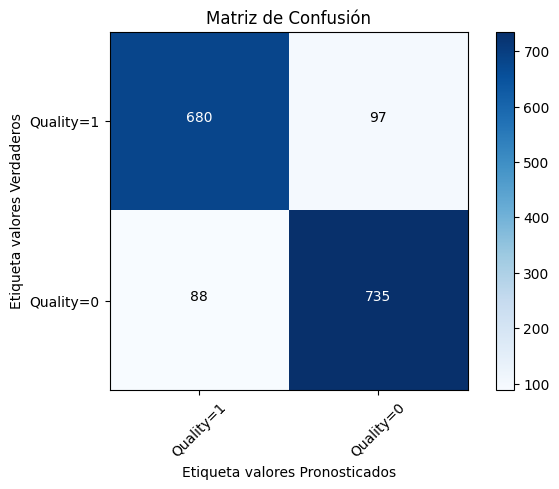

In [99]:
# Calcular matriz de confusión

matriz_confusion = metrics.confusion_matrix(y4_prueba, y4_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Grafica matriz de confusión no normalizada
plt.figure()
grafica_matriz_confusion(matriz_confusion, clases=['Quality=1','Quality=0'],normalizar= False,  titulo='Matriz de Confusión')

**Análisis de la primera fila**: La primera fila es para las bananas cuyo valor real de calidad en el conjunto de prueba es 1 (es decir, La calidad de la banana es Buena). Como se puede calcular, de 1600 bananas, 777 de ellos tienen el valor de abandono en 1. Y de estos 777, el clasificador predijo correctamente 680 de ellas como 1 y predijo erróneamente 97 de ellas como 0.

Esto significa que, para 680 bananas, el valor real de su calidad fue 1 en el conjunto de prueba, y el clasificador también los predijo correctamente como 1. Sin embargo, mientras que la etiqueta real de 97 bananas fue 1, el clasificador los predijo como 0, lo cual no es correcto. Esto se puede considerar como un error del modelo para la primera fila.

**Análisis de la segunda fila**: Hay 823 bananas cuyo valor de calidad era 0 (es decir, malas). El clasificador predijo correctamente 735 de ellos como 0 y 88 de ellos incorrectamente como 1. Por lo tanto, se observa un mayor numero de aciertos , aunque la cantidad de error igual es alta.


In [100]:
print (metrics.classification_report(y4_prueba, y4_hat))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       823
           1       0.89      0.88      0.88       777

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



 **Interpretación General**
- La **exactitud** del 88% indica que el modelo es capaz de clasificar correctamente una alta proporción de las muestras totales.
- Los **F1-scores** cercanos al 0.88 para ambas clases muestran que el modelo tiene un buen equilibrio entre precisión y recall.
En resumen, tanto la exactitud como el F1-score sugieren que tu modelo tiene un rendimiento sólido y equilibrado, siendo capaz de manejar bien las dos clases presentes.

**Pérdida Logística**

La pérdida logística o **log-loss** es una métrica que indica qué tan cerca está la probabilidad de predicción del valor real/verdadero correspondiente (0 o 1 en caso de clasificación binaria). Cuanto más diverja la probabilidad predicha del valor real, mayor será el valor de pérdida logarítmica.

Ahora, se probará realizar una evaluación  **log-loss** para el modelo. En la regresión logística, el resultado puede ser que la probabilidad de abandono de clientes sea sí (o igual a 1). Esta probabilidad es un valor entre 0 y 1. Por lo tanto, **log-loss** mide el rendimiento de un clasificador donde la salida prevista es un valor de probabilidad entre 0 y 1.

Este indicador se utiliza, principalmente para comparar modelos. El modelo que tenga el menor valor de **log-loss** será el mejor evaluado.

In [101]:
print ("Pérdila logística: %.4f" % metrics.log_loss(y4_prueba, y4_hat_prob))

Pérdila logística: 0.3027


Esto sugiere que el modelo podría estar generalizando mejor o ajustándose más cerca de los datos reales.

# Conclusiones de los modelos de clasificación <a id="7"></a>

En base a la comparación entre distintos puntos de ambos modelos, tendremos lo siguiente:

**Precisión Global:**
- El modelo K-Vecinos tiene una precisión global ligeramente mejor en el conjunto de prueba (0.934375) en comparación con la precisión global del modelo de regresión logística (0.88).

**Matriz de Confusión:**
- Ambos modelos muestran una buena distribución de verdaderos positivos y verdaderos negativos, pero el modelo K-Vecinos tiene un menor número de falsos positivos (50 vs 97) y falsos negativos (58 vs 88) en comparación con el modelo de regresión logística.

**Informe de Clasificación:**
- Ambos modelos tienen métricas de precisión, recall y F1-score muy similares en ambas clases, lo que sugiere que su rendimiento es comparable en términos de estas métricas.

**Pérdida Logística y Jaccard:**
- La pérdida logística del segundo modelo es 0.3027, lo cual es un buen valor indicando que el modelo está bien ajustado. El índice de Jaccard de 0.7861 sugiere una buena similitud entre las predicciones y las etiquetas verdaderas.

**Conclusión:**
Basándonos en la precisión global, la matriz de confusión y el informe de clasificación, el modelo de K-Vecinos con k=14 parece tener un rendimiento ligeramente mejor que el modelo de regresión logística. Esto se refleja principalmente en la menor cantidad de falsos positivos y falsos negativos que obtuvieron ambos modelos.

# **Modelo de Agrupamiento usando KMeans**

Para el modelo de agrupamiento se busco una base de datos

In [102]:
from sklearn.cluster import KMeans

# Dataset
df = pd.read_csv('datos/customer_segmentation.csv')

print('Tamaño: ', df.size)
print('Forma: ', df.shape)

Tamaño:  64960
Forma:  (2240, 29)


Para preparar los datos se hará en 3 pasos. Primero, se eliminarán los datos categoricos ya que KMeans trabaja mejor con datos continuos que discretos.

In [103]:
df.drop('Education', axis=1, inplace=True)
df.drop('Marital_Status', axis=1, inplace=True)
df.drop('Dt_Customer', axis=1, inplace=True)

df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


## Preparación de Datos.

Luego, se agregarán 2 columnas, una indicando la edad y otra indicando el total gastado, que se obtendrá de la suma del total gastado de todos los productos. Ádemas, se borrarán las filas con datos que no existan en caso de haberlos.

In [104]:
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                   df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Age'] = 2024 - df["Year_Birth"]

if df[['Income', 'TotalSpent', 'Age']].isnull().any().any():
    df.dropna(subset=['Income', 'TotalSpent'], inplace=True)

Y finalmente, debido a que la base de datos es muy grande, se tendrá que acomodar para no contar con datos outliers. Para esto se usará el método IQR o rango intercuartílico para restar el primer y tercer cuartil.

In [105]:
# Outliers
features = ['Income', 'TotalSpent', 'Age']
k = 1.5

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

Con esto la base de datos nos quedará de la siguiente manera

In [106]:
print('Tamaño: ', df.size)
print('Forma: ', df.shape)

Tamaño:  61656
Forma:  (2202, 28)


In [107]:
X22 = df.values[:,1:]
X22 = np.nan_to_num(X22)
X22_normalizado = preprocessing.StandardScaler().fit_transform(X22)
X22_normalizado

array([[-1.02,  0.32, -0.82, ...,  2.38,  1.69,  1.02],
       [-1.27, -0.25,  1.04, ..., -0.42, -0.97,  1.27],
       [-0.33,  0.97, -0.82, ..., -0.42,  0.29,  0.33],
       ...,
       [ 1.04,  0.26, -0.82, ..., -0.42,  1.07, -1.04],
       [-1.1 ,  0.85, -0.82, ..., -0.42,  0.4 ,  1.1 ],
       [-1.27,  0.06,  1.04, ...,  2.38, -0.72,  1.27]])

In [108]:
num_grupos = 3
k_medias = KMeans(init = "k-means++", n_clusters = num_grupos, n_init = 12)
k_medias.fit(X22_normalizado)
etiquetas = k_medias.labels_
print(etiquetas)

[1 0 2 ... 2 2 0]


In [109]:
df["Clase"] = etiquetas
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Clase
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,1617,67,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,27,70,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,776,59,2
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,53,40,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,422,43,0


In [110]:
df.groupby('Clase').mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age
Clase,,,,,,,,,,,,,,,,,,,,,
0,5595.836130,1972.369200,34083.073050,0.813425,0.433366,49.159921,42.032577,5.135242,24.496545,7.400790,...,0.007897,0.000000,0.000987,0.001974,0.011846,3.0,11.0,0.098717,100.423495,51.630800
1,5682.827206,1968.968750,76168.834559,0.040441,0.161765,49.988971,628.977941,68.095588,460.974265,101.731618,...,0.132353,0.275735,0.226103,0.034926,0.003676,3.0,11.0,0.305147,1409.314338,55.031250
2,5493.032558,1963.310078,58288.007752,0.200000,0.914729,47.987597,444.618605,24.125581,133.772093,31.207752,...,0.130233,0.012403,0.026357,0.013953,0.009302,3.0,11.0,0.100775,716.390698,60.689922


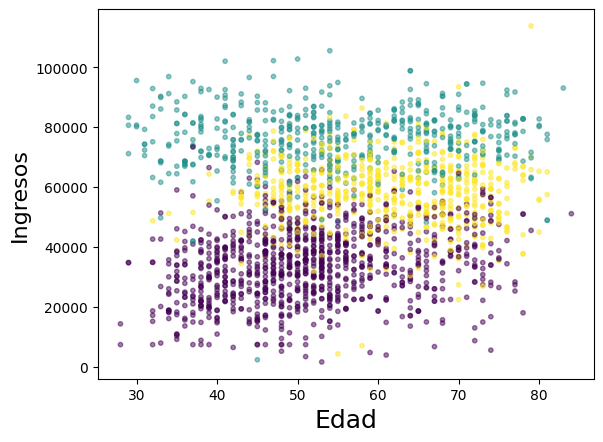

In [111]:
plt.scatter(X22[:, -1], X22[:, 1], s=10, c=etiquetas.astype(float), alpha=0.5)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Ingresos', fontsize=16)

plt.show()

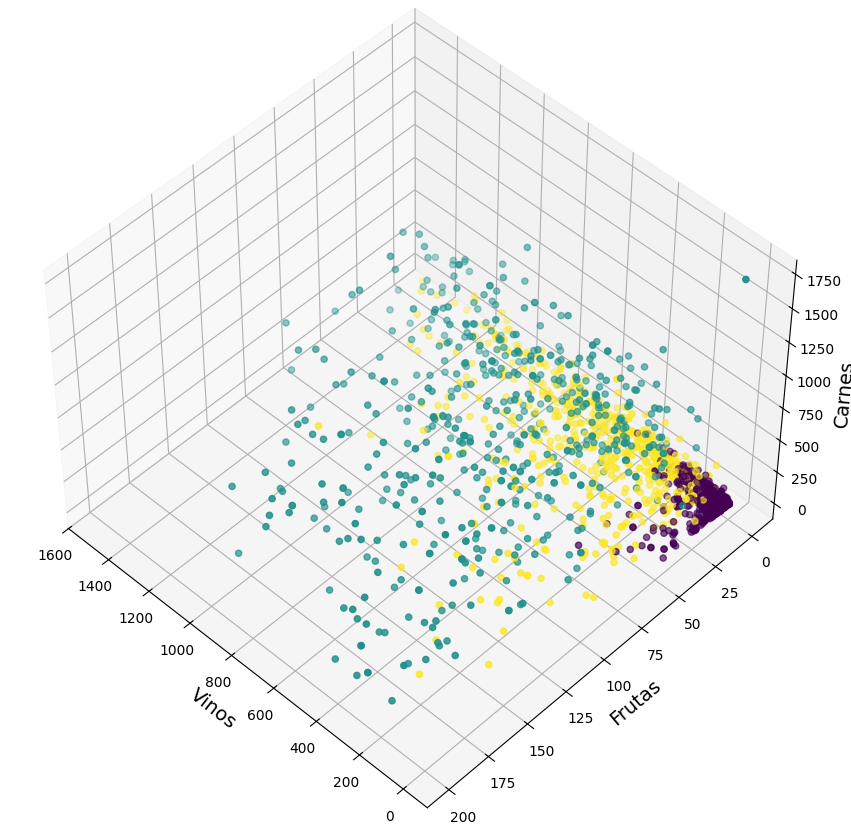

In [112]:
from mpl_toolkits.mplot3d import Axes3D 

figura = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(figura, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
figura.add_axes(ax)
plt.cla()
ax.set_xlabel('Vinos', fontsize=14)
ax.set_ylabel('Frutas', fontsize=14)
ax.set_zlabel('Carnes', fontsize=14)

ax.scatter(X22[:, 5], X22[:, 6], X22[:, 7], c= etiquetas.astype(float))